# 回归

回归是使用非常广泛的统计方法。回归分析常常用来研究某一变量$Y$和其它变量，或者向量($\bf X$)的关系。其中$Y$称为目标变量或响应变量，$X$为解释变量。通常认为它们之间可能具有某种关系，如：$$E(Y|\bf X)=f(\bf X)$$

如果${\bf X} = (X_1,\cdots,X_p)$，并且$f$是线性函数，则这个关系可以写为

$$E(Y|{\bf X})=\beta_0+\beta_1 X_1+\cdots+\beta_p X_p$$

考虑到随机性，通常加入噪声误差项,模型变为：

$$Y=\beta_0+\beta_1 X_1+\cdots+\beta_p X_p+\varepsilon$$

另外，在实际的分析中，$Y$和$\bf X$会有很多重复观察。记  若 $Y_i$ 和 $Y$独立同分布， ${{\bf X}_i}= (X_{i,1},\cdots,X_{i,p})$ 和$\bf X$独立同分布，$\varepsilon_i$和$\varepsilon$独立同分布。上述模型进一步表示为：


$$Y_i=\beta_0+\beta_1 X_{i,1}+\cdots+\beta_p X_{i,p}+\varepsilon_i$$

$\beta_0$为截距项，刻画当所有$X_{i,j}$都是0时，$Y_i$的期望。$\beta_1,\cdots,\beta_p$是回归系数，是回归直线的斜率。$\beta_j$ 刻画 $X_{i,j}$变动一个单位时 $Y_i$的改变量。

$\varepsilon_i$通常假设是期望为0，方差为$\sigma_\varepsilon$的iid变量

一般情形下，如果假设$\bf X$ 是随机的，我们需要假设$\varepsilon_1,\cdots,\varepsilon_n$ 和${\bf X}_1,\cdots,{\bf X}_n$是独立的。

## 回归模型的假设总结

1. $E( Y_i| X_{i,1},\cdots,X_{i,p})=\beta_0+\beta_1 X_{i,1}+\cdots+\beta_p X_{i,p}$, 
     等价于 $$Y_i=\beta_0+\beta_1 X_{i,1}+\cdots+\beta_p X_{i,p}+\varepsilon_i; \quad \mbox{并且 }  E(\varepsilon_i| X_{i,1},\cdots,X_{i,p})=0$$ 
2. 误差项独立： $\varepsilon_1,\cdots,\varepsilon_n$ 是独立的
3. 误差项的方差是常数： $\mbox{Var}(\varepsilon_i)=\sigma_\epsilon^2$
4. 高斯误差: $\varepsilon_i\sim N(0,\sigma_\epsilon^2)$

由经典的线性模型的最小二乘估计：

参数向量$\vec{\beta}=(\beta_1,\cdots,\beta_p)^T$的估计为

$$\hat{\vec{\beta}}=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf Y}$$

其中 ${\bf X} $ 是观察数据的设计矩阵

**在上述假设下（2，3）**，我们有
$$\mbox{Var}(\hat{\vec{\beta}})=({\bf X}^T{\bf X})^{-1}\sigma_\varepsilon^2$$

再结合正态分布假设，我们就可以推断出$\hat{\vec{\beta}}$其实服从多元正态分布，因而可以进行j显著性检验等统计推断。

金融或经济数据中常常需要对时间序列进行回归。 比如不同期限的利率的回归，通过宏观经济指数预测市场指数等。这些都是时间序列的数据。因为时间序列数据可能具有自相关性，在回归时一定要做误差项的独立性检验，或者白噪声检验。 

## 虚假的相关性及其解决

![](timereg.png)

![](timeregcomment.png)

下面我们做两个分析，第一个是指数和汽车产量，第二个是两个不同期限的债券收益率。

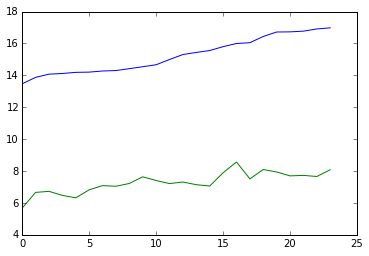

In [19]:
import pandas as pd
import numpy as np
car=pd.read_excel("data\caryearprod.xls",index_col=0)
car=np.log(car["1991":])
car.index.name="date"
shindex=pd.read_csv("data/000001.csv",index_col=0,parse_dates=True)
shindex=shindex.ix["1991":"2014"]["close"].resample("A",how="last")
shindex=np.log(shindex)
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(car)
plt.plot(shindex)

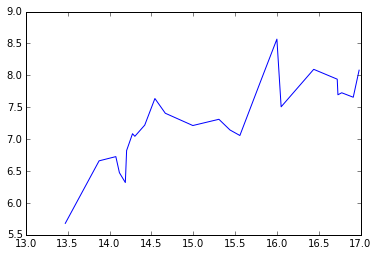

In [17]:
plt.plot(car,shindex)

In [39]:
import statsmodels.api as sm

#X = sm.add_constant(car, prepend=False)

results = sm.OLS(shindex, X).fit()

results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     42.22
Date:                Fri, 18 Dec 2015   Prob (F-statistic):           1.55e-06
Time:                        13:36:37   Log-Likelihood:                -10.318
No. Observations:                  24   AIC:                             24.64
Df Residuals:                      22   BIC:                             26.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
prod           0.4698      0.072      6.497      0.000         0.320     0.620
const          0.1282      1.105      0.116      0.909        -2.164     2.420
==============================================================================
Omnibus:                        1.495   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                0.625
Skew:                           0.379   Prob(JB):                        0.732
Kurtosis:                       3.228   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

下面关于残差的自相关系数分析说明上述模型的自回归系数0.4698是非常不可靠的.我们不能用它来解释两个变量之间的关系.

In [63]:
from  statsmodels.tsa.stattools import q_stat, acf
print acf(results.resid) 
q_stat(results.resid,len(results.resid))

[ 1.          0.3102145   0.01847246  0.0268314  -0.12667895 -0.27510486
 -0.1567117   0.080385    0.06327573  0.01441997  0.02611726 -0.11800815
 -0.27808186 -0.13786777 -0.01831132 -0.1402852  -0.20699175  0.10043545
  0.02819492  0.05013804  0.07146388  0.06465057  0.09754767  0.00589472]


(array([  16.4275305 ,   16.43196441,   16.43888301,   19.02010116,
          26.43381229,   26.44686278,   28.74658873,   30.25351834,
          34.42278614,   54.81609986,   62.01250491,   62.09598547,
          62.10020616,   65.63113008,   75.66501427,   84.68585195,
         160.61095814,  163.34423256,  170.69756172,  170.99593938,
         188.72986379,  213.55128535,  321.86403401,           inf]),
 array([  5.05457605e-05,   2.70298892e-04,   9.21645103e-04,
          7.78829362e-04,   7.35072405e-05,   1.83762511e-04,
          1.60917118e-04,   1.90637232e-04,   7.52930734e-05,
          3.41792796e-08,   3.91167863e-09,   9.33983427e-09,
          2.20579675e-08,   1.18004492e-08,   4.29280770e-10,
          2.35470149e-11,   2.01443442e-25,   1.84276476e-25,
          2.07497393e-26,   5.54880985e-26,   5.88463395e-29,
          2.48392998e-33,   1.70386992e-54,   0.00000000e+00]))

下面的数据是来自wind的上海证券交易所债券到期收益率日数据,绿色为三年期收益率,蓝色为一年期收益率.

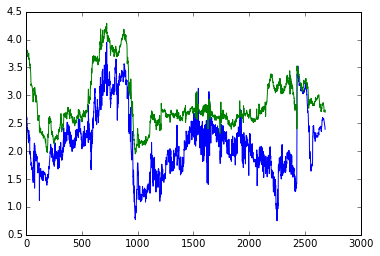

In [59]:
rates=pd.read_csv("data/bondyield.csv",index_col=0,parse_dates=True) 
rates=rates.dropna()
plt.plot(rates)


显然有明显的正相关性

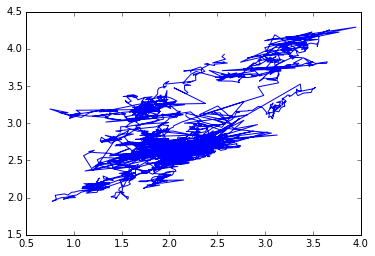

In [60]:
plt.plot(rates["j1"],rates["j3"])

用线性回归建模

In [61]:
X = sm.add_constant(rates["j1"], prepend=False)
results2 = sm.OLS(rates["j3"], X).fit()

results2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     j3   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2717.
Date:                Fri, 18 Dec 2015   Prob (F-statistic):               0.00
Time:                        14:12:38   Log-Likelihood:                -939.38
No. Observations:                2681   AIC:                             1883.
Df Residuals:                    2679   BIC:                             1895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
j1             0.6173      0.012     52.126      0.000         0.594     0.641
const          1.5401      0.026     58.840      0.000         1.489     1.591
==============================================================================
Omnibus:                      254.766   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.013
Skew:                           0.777   Prob(JB):                     2.36e-64
Kurtosis:                       2.542   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

分析残差,发现其自相关性非常强烈,和单位根过程非常接近

(array([ 17.25971909,  34.55119484,  50.17529307, ...,          inf,
                 inf,          inf]),
 array([  3.26025555e-05,   3.14270320e-08,   7.33109839e-11, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]))

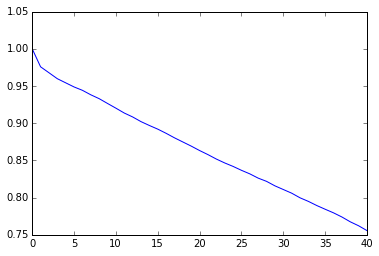

In [65]:
plt.plot(acf(results2.resid.values) )
q_stat(results2.resid,len(results.resid))

残差差分后,发现有较大的低阶自相关性

0.0386333704643


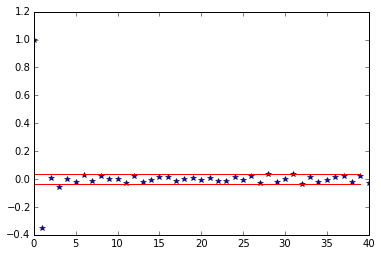

In [93]:
resi=results2.resid-results2.resid.shift(1)
resi=resi.dropna()
plt.plot(acf(resi),"*",[2/np.sqrt(len(resi))]*40,"r-",[-2/np.sqrt(len(resi))]*40,"r-")
print 2/np.sqrt(len(resi))

通过模型选择方法,可以选3阶滑动平均模型. 注意,这里是残差经过差分后的模型

In [78]:
es = sm.tsa.arma_order_select_ic(resi, ic=['aic', 'bic'], trend='nc',max_ar=4, max_ma=3)
print es.aic_min_order,es.bic_min_order
print es.aic
print es.bic

(0, 3) (0, 3)
             0            1            2            3
0          NaN -6810.358308 -6816.103249 -6824.952292
1 -6717.493460 -6818.560582 -6820.101638 -6822.954261
2 -6765.530342 -6822.746205 -6823.171100 -6821.596043
3 -6801.318331 -6823.384873 -6821.893410 -6820.138989
4 -6813.439586 -6821.749740 -6820.905263 -6820.221096
             0            1            2            3
0          NaN -6798.571164 -6798.422533 -6801.378004
1 -6705.706316 -6800.879866 -6796.527349 -6793.486400
2 -6747.849626 -6799.171916 -6793.703240 -6786.234611
3 -6777.744043 -6793.917013 -6786.531978 -6778.883984
4 -6783.971725 -6786.388308 -6779.650259 -6773.072519


因此我们下面考虑模型

$$(1-L)(y_t-X_t\beta)=B(L)\varepsilon_t$$


其中$$B(L)=1+b_1L+b_2L^2+b_3L^3$$
$\beta$中可以包含截距项和回归项系数

In [97]:
#这里也可以在fit中指定常数而不用在回归中使用常数项

X = sm.add_constant(rates["j1"], prepend=False)


results2 = sm.OLS(rates["j3"], X).fit()

 
arma_mod1 = sm.tsa.ARIMA(rates["j3"], order=(0,1,3),exog =X)
arma_res = arma_mod1.fit(trend='nc')
arma_res.summary2()
 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            Log-Likelihood:      4109.5    
Dependent Variable: D.j3             Scale:               1.0000    
Date:               2015-12-18 14:53 Method:              css-mle   
No. Observations:   2680             Sample:              01-05-2005
Df Model:           5                                     12-17-2015
Df Residuals:       2675             S.D. of innovations: 0.052     
AIC:                -8206.9186       HQIC:                -8194.126 
BIC:                -8171.5572                                      
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
j1               0.0028    0.0013    2.1642  0.0305   0.0003   0.0053
const           -0.0064    0.0028   -2.2545  0.0242  -0.0120  -0.0008
ma.L1.D.j3      -0.3173    0.0194  -16.3203  0.0000  -0.3555  -0.2792
ma.L2.D.j3       0.0121    0.0196    0.6147  0.5388  -0.0264   0.0505
ma.L3.D.j3       0.0058    0.0192    0.3024  0.7624  -0.0319   0.0435
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1            3.7699            -1.9188           4.2301            -0.0749
MA.2            3.7699             1.9188           4.2301             0.0749
MA.3           -9.6141            -0.0000           9.6141            -0.5000
====================================================================

"""

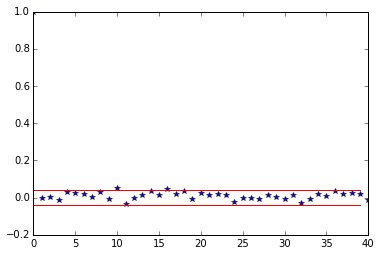

In [98]:
plt.plot(acf(arma_res.resid),"*",[2/np.sqrt(len(resi))]*40,"r-",[-2/np.sqrt(len(resi))]*40,"r-")

也可以考虑ARIMA(0,1,1),比较后两者结果差异并不大.

In [99]:
arma_mod1 = sm.tsa.ARIMA(rates["j3"], order=(0,1,1),exog =X)
arma_res = arma_mod1.fit(trend='nc')
arma_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            Log-Likelihood:      4109.1    
Dependent Variable: D.j3             Scale:               1.0000    
Date:               2015-12-18 14:53 Method:              css-mle   
No. Observations:   2680             Sample:              01-05-2005
Df Model:           3                                     12-17-2015
Df Residuals:       2677             S.D. of innovations: 0.052     
AIC:                -8210.2678       HQIC:                -8201.739 
BIC:                -8186.6935                                      
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
j1               0.0027    0.0013    2.1286  0.0334   0.0002   0.0051
const           -0.0062    0.0028   -2.2229  0.0263  -0.0116  -0.0007
ma.L1.D.j3      -0.3123    0.0181  -17.2434  0.0000  -0.3478  -0.2768
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1            3.2023             0.0000           3.2023             0.0000
====================================================================

"""

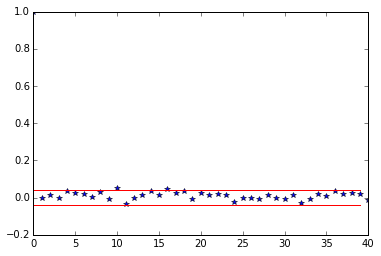

In [100]:
plt.plot(acf(arma_res.resid),"*",[2/np.sqrt(len(resi))]*40,"r-",[-2/np.sqrt(len(resi))]*40,"r-")